# 🛒 Retail Sales Forecasting - EDA & Modeling
This notebook loads the Walmart dataset, performs quick exploratory data analysis (EDA), trains a Prophet model, and saves it for later use in the dashboard and API.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import joblib

# Load dataset
df = pd.read_csv("../data/walmart.csv")
df = df.rename(columns={"Date": "ds", "Weekly_Sales": "y"})

# FIX: Use correct date format (day-month-year)
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y')

df.head()

,Store,ds,y,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## 📊 Quick EDA

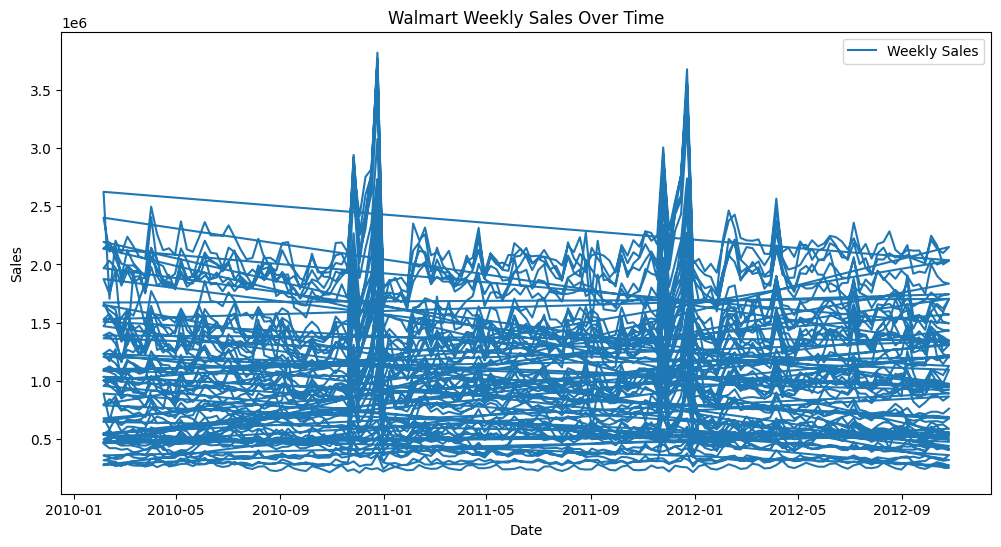

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label="Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Walmart Weekly Sales Over Time")
plt.legend()
plt.show()

## 🤖 Train Prophet Model

In [6]:
import os
from prophet import Prophet
import joblib

# Create the models directory if it doesn't exist
models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)

# Fit the model
model = Prophet()
model.fit(df)

# Save model
joblib.dump(model, "../models/prophet_model.pkl")
print("✅ Model saved to ../models/prophet_model.pkl")

15:46:31 - cmdstanpy - INFO - Chain [1] start processing
15:46:32 - cmdstanpy - INFO - Chain [1] done processing


✅ Model saved to ../models/prophet_model.pkl


## 🔮 Forecast Next 30 Days

In [7]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2012-11-21,1.183447e+06,465066.108577,1.881067e+06
169,2012-11-22,1.188070e+06,477291.507292,1.962783e+06
170,2012-11-23,1.192835e+06,495231.044407,1.913081e+06
171,2012-11-24,1.197890e+06,526228.343815,1.901365e+06
172,2012-11-25,1.203378e+06,511749.982930,1.914124e+06


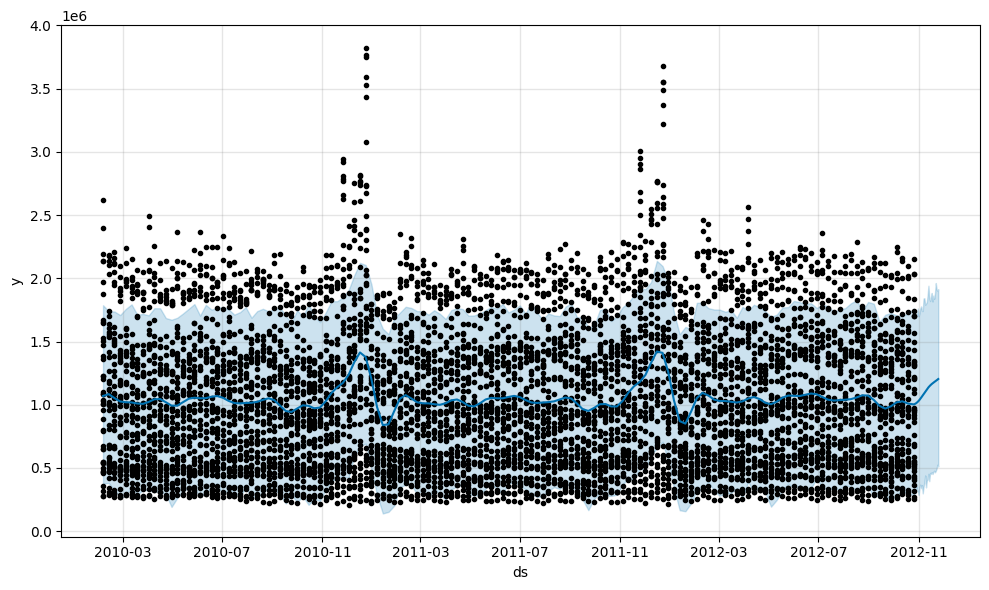

In [8]:
fig1 = model.plot(forecast)
plt.show()

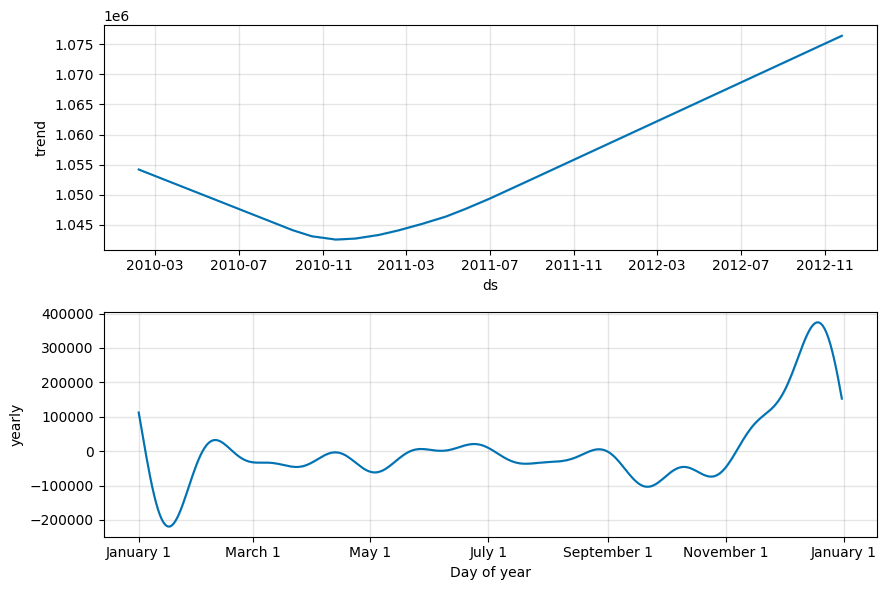

In [9]:
fig2 = model.plot_components(forecast)
plt.show()